

## What is Differential Item Functioning?
The assumption of measurement invariance states that, holding constant one's latent "ability," a particular item has equivalent properties across groups of individuals. It **does not** imply that groups are equivalent in their distribution of their latent ability; instead, it merely means that controlling for varying item properties confounds estimated differences between groups, and it potentially biases parameters estimates in explanatory models.

Whether DIF is substantively impactful has largely gone unexplored in the political behavior literature. The noteable exception is Perez and Hetherington (2012). In this article, they show that differential item functioning is present in the authoritarianism scale, which they suggest accounts for the disconnect between authoritarianism and ideology among African Americans. While they show DIF, the empirical technique they use -- confirmatory factor analysis -- is somewhat different than what we use here, Bayesian Item Response Theory.

Following DeBoeck and Wilson (2004), measurement invariance may be understood using a simple generalized linear model. For instance, assume $j$ binary items in a scale, the $i$th respondent's likelihood of agreeing with that item.  

### One Parameter Logistic Model

\begin{eqnarray}
p(y_{ij}|\theta_i, \beta_j)={{1}\over
{1+exp^{-(\beta_j+\theta_i)}}}
\end{eqnarray}

The probability of a "1" response is a function of the latent ability for the $i$th respondent, $\theta_i$ and the $j$th item difficulty parameter ($\beta$). These are substantively important variables, which are frequently referred to as person and item parameters, respectively. The ability parameters represent an estimate of the respondent's score on the latent trait; the item parameters represent characteristics of items,such as how easy or hard an item is ($\beta_j$).  In the psychometrics literature, the above model is referred to as "Rasch model" or a "one-parameter'' IRT model. Notice this model "suppresses" the intercept; this is a necessary identifying assumption to estimate a unique $\beta$ for each item.

We can extend the model by regressing the latent authoritarianism values on person level covariates, such as race. This allows us to ascertain whether racial identification influences authoritarianism -- is there a group mean difference?

### One Parameter Logistic Model with Mean Differences
\begin{eqnarray}
p(y_{ij}|\theta_{i}, \beta_j, \delta)={{1}\over
{1+exp^{-(\beta_j+\theta_{i} + \delta)}}}
\end{eqnarray}

The only addition to the model is $\delta$, which in our application represents the mean difference between Blacks and Whites. It's no different from the coefficient if one were to regress latent authoritarianism on racial identification.

### One Parameter Logistic Model with Mean Differences and Differential Item Functioning

The only addition to the model is the new subscript -- **g** -- corresponding to whether one identifies as African American or White. The model accounts for differential item functioning, as the item paramters now vary across racial categories. The model allows us to explore several expectations. First, we can examine the extent to which racial differences in authoritarianism $\delta$ change when one frees the item parameters to vary across a person indicator ($\beta_{gj}. 

\begin{eqnarray}
p(y_{gij}|\theta_{i}, \beta_{gj}, \delta)={{1}\over
{1+exp^{-(\beta_{gj}+\theta_{i} + \delta)}}}
\end{eqnarray}

If $\beta_j$ is different across racial groups, this would suggest that estimated mean differences may be inflated or deflated. Perhaps there is no mean difference in authoritarianism when one accounts for DIF. In this situation, estimated mean differences might substantially change, indicative of bias generated by non-random measurement error. 




In [294]:
### Load Data/packages:
rm(list=ls())

require(dplyr)
require(ggplot2)
library(ggpubr)
library(brms)

load("/users/chrisweber/Dropbox/Working Projects/Authoritarianism_BookProject/Data/Voter2016.RData")
source("/users/chrisweber/Dropbox/Working Projects/Authoritarianism_BookProject/Analysis/Functions/BookFunctions.R")
setwd("/users/chrisweber/Dropbox/")


full.data$authoritarianism<-rowMeans(cbind(full.data$auth1, full.data$auth2, 
                                           full.data$auth3, full.data$auth4), 
                                     na.rm=T)
full.data$id_m=seq(1:length(full.data$auth1))

temp_full=full.data

full.data<-full.data %>% filter(black.2011 ==1 | white.2011 ==1)  %>%
                         mutate(race=ifelse(black.2011==1, 1, 0)) %>%
                         subset(select=c("race", "auth1", "auth2", "auth3", "auth4", "id_m")) %>%
                         na.omit() 

full.data$id<-seq(1:nrow(full.data))
full.data$race<-as.factor(full.data$race)
bayes.dat<-full.data[,2:ncol(full.data)]
stan_dat<-reshape2::melt(full.data, id=c("id", "race", "id_m")) ### Analyzed Stan Data


In [ ]:

Here are the models I estimated. They took a bit, so I just put the code here and load the results below.

### Estimated models
# m_one_parameter_logistic <- bf(value ~ 0 + race + (1 | variable) + (1 | id))

# prior1 <- 
#   prior("normal(0, 3)", class = "sd", group = "variable") + 
#   prior("normal(0, 1)", class = "sd", group = "id")

# m1 <- brm(
#   formula = m_one_parameter_logistic,
#   data = stan_dat,
#   family = brmsfamily("bernoulli", "logit"),
#   prior=prior1,
#   seed=1234,
#   cores=8,
#   file="one_pl_cov")

# rm(list=ls())
# a<-readRDS("one_pl_cov.rds")

# kfold(a, K=3)



# library(future)
# plan(multiprocess)
# a<-kfold(m1)

# m_one_parameter_logistic_dif <- bf(value ~ 1 + race + (0+race | variable) + (1 | id))
# prior2 <- 
#   prior("normal(0, 3)", class = "sd", group = "variable") + 
#   prior("normal(0, 1)", class = "sd", group = "id")
# m2 <- brm(
#   formula = m_one_parameter_logistic_dif,
#   data = stan_dat,
#   family = brmsfamily("bernoulli", "logit"),
#   prior=prior2,
#   cores=8,
#   file="one_pl_cov_dif")

# m_two_parameter_logistic_dif<- bf(
#   value ~ exp(logalpha) * eta ,
#   eta ~ 1 + race + (0 + race | variable) + (1 | id),
#   logalpha ~ 1 + race + (0+race | variable),
#   nl = TRUE
# )

# # specify some weakly informative priors
# prior3 <- 
#   prior("normal(0, 5)", class = "b", nlpar = "eta") +
#   prior("normal(0, 1)", class = "b", nlpar = "logalpha") +
#   prior("constant(1)", class = "sd", group = "id", nlpar = "eta") + 
#   prior("normal(0, 3)", class = "sd", group = "variable", nlpar = "eta") +
#   prior("normal(0, 1)", class = "sd", group = "variable", nlpar = "logalpha")

# rm(list=c("m1", "m2"))
# m3 <- brm(
#   formula = m_two_parameter_logistic_dif,
#   data = stan_dat,
#   family = brmsfamily("bernoulli", "logit"),
#   prior=prior3,
#   seed=1234,
#   cores=8,
#   file="two_pl_dif")

m1<-readRDS("one_pl_cov.rds")
m2<-readRDS('one_pl_cov_dif.rds')
#m3<-readRDS('two_pl_dif.rds')





I estimated three models. The first model is a one parameter logistic model, with estimated differences for Whites and Blacks. The second is an extension of this model, but with varying item parameters for each racial group. Because these are "partial pooling" models, we should not need to a priori specify an anchor. Instead, the parameters are drawn from the same underlying distribution. This, of course, requires priors. For identification, I specify a strong **normal(mean=0,sd=1)** prior for the underlying ability estimate, and a weakly informative **normal(mean=0, sd=3)** for the item parameters. I also estimated a 2PL model, though I'm not sure it's necessary since it's more complex and nothing much changes.

### Group Mean Differences

It's perhaps easiest to start by examining the distributions of authoritarianism across racial categories, for each of these models. We should expect, per Perez and Hetherington, that estimated group mean differences should be an artifact brought about by item bias. Below I present the results for the 1PL model. It's clear that the DIF corrected version attenuates estimated group mean differences.

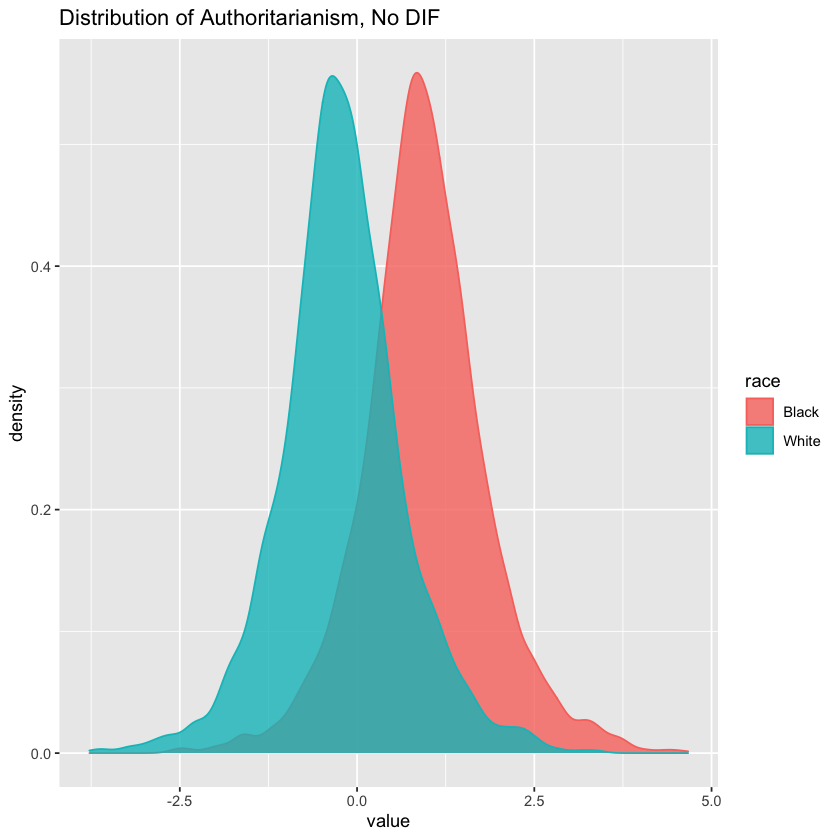

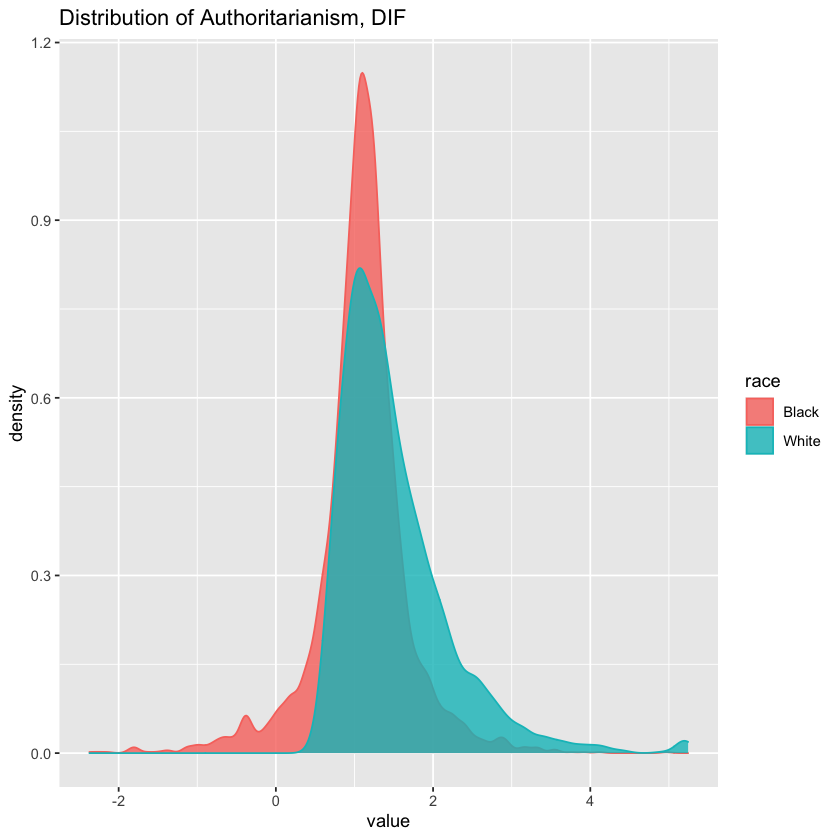

In [368]:
data.frame(
            value = c(posterior_samples(m1, pars="race0")[,1],
                      posterior_samples(m1, pars="race1")[,1]),
            race  = rep(c("White", "Black"), each=4000)  ### 4000 samples, adjust if change this
    )  %>% 
      ggplot(aes(x=value, group=race, colour = race, fill = race)) +
       geom_density(alpha=0.8) +
       ggtitle("Distribution of Authoritarianism, No DIF")


data.frame(
            value = c(posterior_samples(m2, pars="race0")[,1],
                      posterior_samples(m2, pars="race1")[,1]),
            race  = rep(c("White", "Black"), each=4000)  ### 4000 samples, adjust if change this
    )  %>% 
      ggplot(aes(x=value, group=race, colour = race, fill = race)) +
       geom_density(alpha=0.8) +
       ggtitle("Distribution of Authoritarianism, DIF")



We might also examine the estimated parameters in the DIF model, relative to the no DIF model

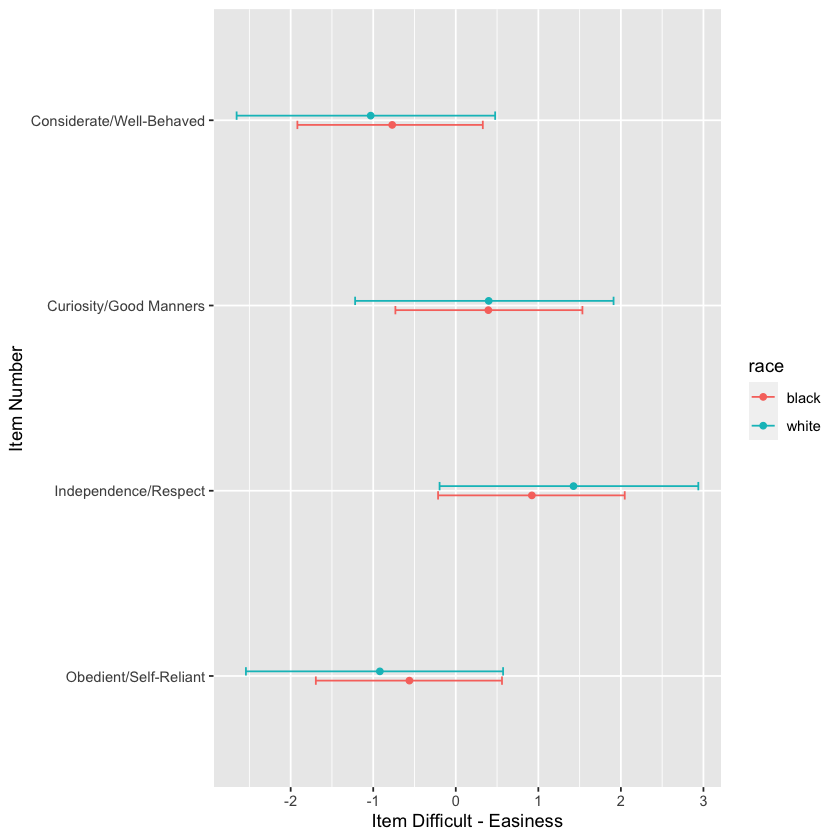

In [369]:
library(tibble)
items <- ranef(m2)$variable

# plot item parameters
white=items[, , "race0"] %>%
  as_tibble() %>%
  rownames_to_column() %>%
  rename(item = "rowname") %>%
  mutate(item = as.numeric(item)) 
black=items[, , "race1"] %>%
  as_tibble() %>%
  rownames_to_column() %>%
  rename(item = "rowname") %>%
  mutate(item = as.numeric(item)) 

data.frame(rbind(white, black)) %>%
  mutate(race=rep(c("white", "black"), each=nrow(white))) %>%
  ggplot(aes(x=as.factor(item), y=Estimate, ymin = Q2.5, ymax = Q97.5,
             colour=race, group=race)) +
  geom_errorbar(position = position_dodge2(width = 0.1, padding = 0.1),
               width=0.1)+
  geom_point(position = position_dodge2(width = 0.1, padding = 0.1))+
  coord_flip() +
  labs(x = "Item Number", y="Item Difficult - Easiness")+
  scale_x_discrete(labels=c("Obedient/Self-Reliant", "Independence/Respect", 
                            "Curiosity/Good Manners",
                            "Considerate/Well-Behaved"))

There is a slight, albeit difficult to interpret pattern: Obedience and Well-Behaved are "harder" to answer for White respondents. African Americans less of the latent trait to agree with these items. Here are the point estimates.

In [370]:
black ## Difficulty-Easiness Estimates for Blacks
white ## and whites

item,Estimate,Est.Error,Q2.5,Q97.5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.5616125,0.5688431,-1.6951714,0.5598792
2,0.9216233,0.5676124,-0.2143915,2.0467520
3,0.3943009,0.5668409,-0.7314953,1.5340976
4,-0.7702219,0.5646238,-1.9185915,0.3274589


item,Estimate,Est.Error,Q2.5,Q97.5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.9197292,0.7313298,-2.5420568,0.5731600
2,1.4260111,0.7314944,-0.1963431,2.9378940
3,0.3986445,0.7321427,-1.2193342,1.9113564
4,-1.0305890,0.7313591,-2.6547440,0.4770111


White respondents find items 1 and 4 easier -- again, this is "well-behaved" and "obedient. "Curiosity" shows no DIF. And, somewhat contrary to expectations, Independence versus Respect are harder for Blacks.

### Fit Statistics

Below I present a few fit statistics/approaches to compare these two models -- the 1PL with DIF and the 1PL without. Here are the results for the posterior predictive estimates. The way we can interpret this is I have generated posterior predictions for every value in the dataset. Then we can compare that to the actual reported values. 


In [371]:
yrep_m1 <- posterior_predict(m1, draws = 500)
yrep_m2 <- posterior_predict(m2, draws = 500)
y <- stan_dat$value



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



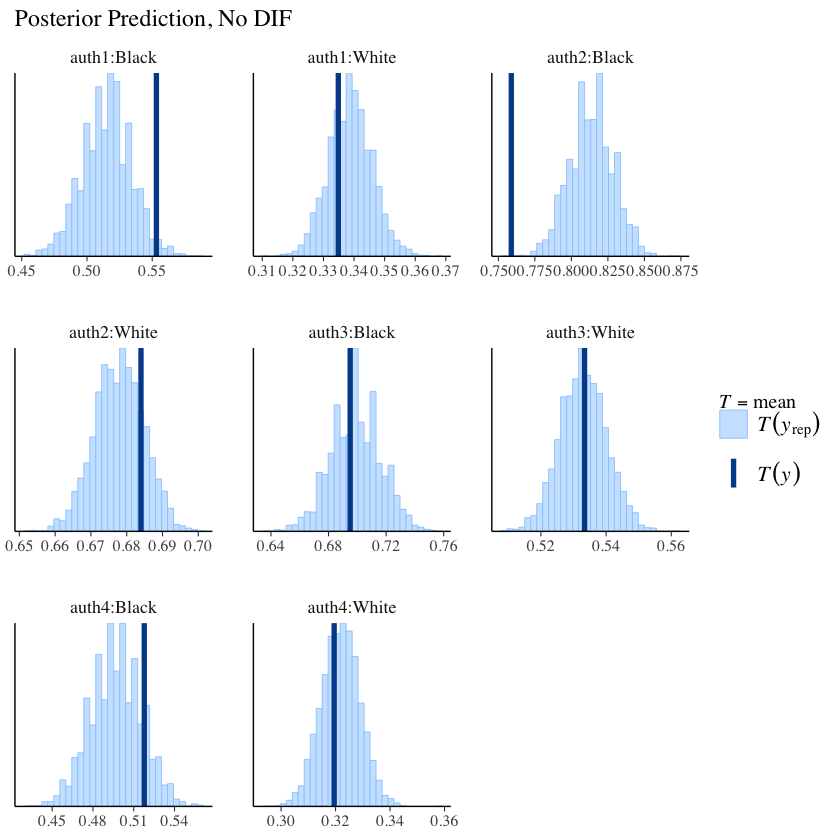

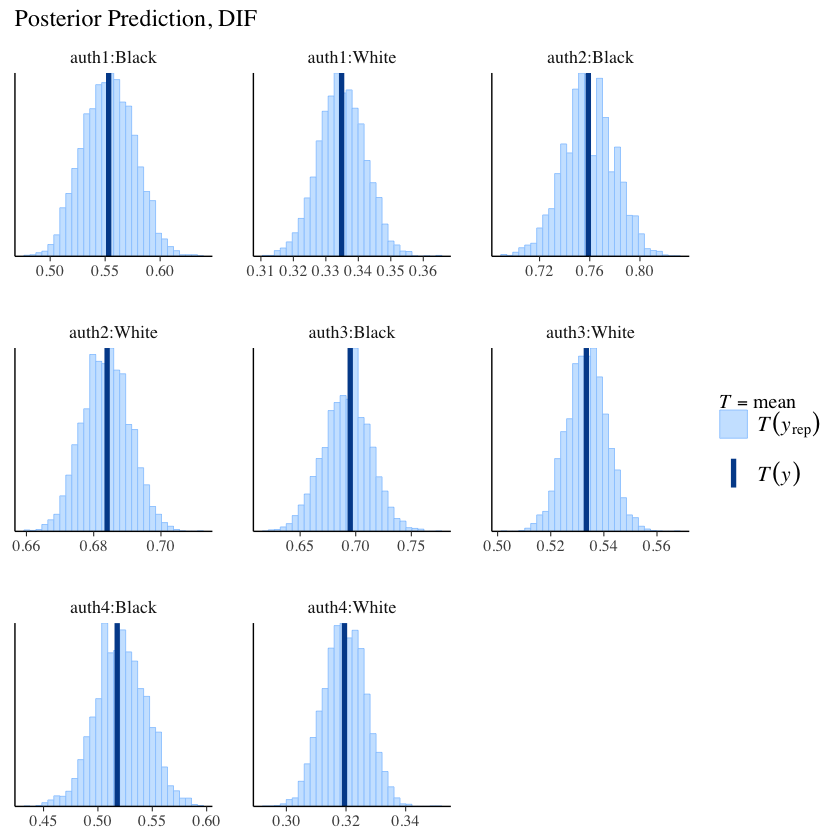

In [164]:
color_scheme_set("brightblue")
stan_dat$group  =  ifelse(stan_dat$race==0, "White", "Black") %>% as.factor()
ppc_stat_grouped(y, yrep_m1, group = stan_dat$variable:stan_dat$group) + ggtitle("Posterior Prediction, No DIF")
ppc_stat_grouped(y, yrep_m2, group = stan_dat$variable:stan_dat$group) + ggtitle("Posterior Prediction, DIF")

This supports Perez and Hetherington. There is clearly "uniform DIF" -- i.e., DIF in difficulty parameters -- though I don't think they present it as such, nor do they test things incrementally. They just estimate a fully invariant model. The posterior predictive distributions represent the average number of times a 1 is observed in 4000 samples from the posterior distribution for each item by racial group. The posterior predictive densities, relative to the the observed agreeement -- noted as T(y) in the legend. The value is simply the mean, for each racial category and each item.

One thing is relatively clear: There is measurement invariance for these items. The DIF model fits much better than the no-DIF model. We should expect to see a distribution centered at the solid blue bar, indicating that for each item $\times$ racial group permutation the observed and simulated data are similar. The differential item functioning model better reproduces the observed data.

We're underestimating agreement with items 1 and 4, corresponding to **Obedience** versus **Self-Reliance** and **Considerate** versus **Well-Mannered**. The model absent DIF understates the degree of authoritarianism on these items. Freeing the parameter estimates for these items improves fit. But, what is clear is that the **Independence** versus **Respect** is biased in the opposite direction. We seriously overestimate the amount of authoritarianism among African Americans in the No-DIF model. 




Another important measure of fit is leave-one-out cross validation.

In [ ]:
options(mc.cores = 1) 
a <- loo(m1, cores=1)
b <- loo(m2, cores=1)



In [ ]:
plot(a)
plot(b)



In [ ]:
loo_compare <- loo_compare(a, b)
print(loo_compare, simplify = FALSE)




The **m2** model is the DIF model, the **m1** model is invariant model. All these statistics point to a worsening of fit by constraining these estimates. Again, there is only one thing that differs between these models: Whether $\beta_j$ is constrained to equality across racial categories (**m1**) or whether $\beta_j$ varies by group (**m2**)

### Reexploring Perez and Hetheringon



Perez and Hetherington contend that measurement error -- differential item functioning -- creates measurement artifacts explaining why authoritarianism has non-obvious relationships with other variables, such as ideology, egalitarianism, racial resentment and related political value orientations. However, they do not effectively test this in their piece. Instead, they show measurement invariance, and suggest that it is because of measurement invariance that such correlations are observed. In fact, one may empirically ascertain whether DIF-produced  artifacts confound the relationship between authoritarianism and distal variables.

We start by retrieving the authoritarianism estimates from our DIF and Non-DIF models. If DIF is producing a measurement artifact confounding correlation estimates, than the DIF corrected ability scores should produce a DIF-corrected unbiased estimate. It is also conceivable that DIF, while empirically established here, **does not** conflate correlation estimates in a structural model. That's not to say DIF is unimportant, but instead, it affects group mean estimates to a greater extent than correlations of authoritarianism with other variables among Blacks and Whites.

I start by extracting the posterior mean estimates of authoritarianism for each individual.


In [314]:
# Some code to merge posterior means to full dataset
no_dif = ranef(m1)$id %>% as.numeric() 
dif = ranef(m2)$id %>% as.numeric() 

stan_dat = stan_dat %>%
        mutate(nd=no_dif) %>% 
        mutate(d=dif) 
dat=merge(stan_dat, temp_full, by="id_m", all_y=T)
dat$egalitarianism<-rowMeans(cbind(dat$egal1, dat$egal2, 
                                           dat$egal3, dat$egal4), na.rm=T)

Below I went ahead and show the relationship between the DIF corrected measures and two outcomes, egalitarianism and ideology. Perez and Hetherington do a bit more, but I stopped to be sure I'm not missing anything. Doesn't look like DIF changes much.

In [353]:
paste("DIF: Whites")
with(dat, cor.test(egalitarianism[race==0], d[race==0]))### Correlation for whites, DIF
paste("No DIF: Whites")
with(dat, cor.test(egalitarianism[race==0], nd[race==0]))### Correlation for whites,No DIF
paste("DIF: Whites")
with(dat, cor.test(egalitarianism[race==1], d[race==1]))### Correlation for blacks, DIF
paste("No DIF: Whites")
with(dat, cor.test(egalitarianism[race==1], nd[race==1]))### Correlation for blacks,No DIF

paste("DIF: Whites")
with(dat, cor.test(ideology.2016[race==0], d[race==0]))### Correlation for whites, DIF
paste("No DIF: Whites")
with(dat, cor.test(ideology.2016[race==0], nd[race==0]))### Correlation for whites,No DIF
paste("DIF: Whites")
with(dat, cor.test(ideology.2016[race==1], d[race==1]))### Correlation for blacks, DIF
paste("No DIF: Whites")
with(dat, cor.test(ideology.2016[race==1], nd[race==1]))### Correlation for blacks,No DIF



[1] "DIF: Whites"


	Pearson's product-moment correlation

data:  egalitarianism[race == 0] and d[race == 0]
t = 27.64, df = 16402, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1962930 0.2255373
sample estimates:
      cor 
0.2109623 


[1] "No DIF: Whites"


	Pearson's product-moment correlation

data:  egalitarianism[race == 0] and nd[race == 0]
t = 27.569, df = 16402, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1957687 0.2250198
sample estimates:
      cor 
0.2104414 


[1] "DIF: Whites"


	Pearson's product-moment correlation

data:  egalitarianism[race == 1] and d[race == 1]
t = 3.7565, df = 1506, p-value = 0.0001789
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.04609318 0.14611632
sample estimates:
       cor 
0.09634798 


[1] "No DIF: Whites"


	Pearson's product-moment correlation

data:  egalitarianism[race == 1] and nd[race == 1]
t = 3.8173, df = 1506, p-value = 0.0001404
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.04764954 0.14764246
sample estimates:
       cor 
0.09789306 


[1] "DIF: Whites"


	Pearson's product-moment correlation

data:  ideology.2016[race == 0] and d[race == 0]
t = 35.789, df = 21354, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2251870 0.2504933
sample estimates:
      cor 
0.2378805 


[1] "No DIF: Whites"


	Pearson's product-moment correlation

data:  ideology.2016[race == 0] and nd[race == 0]
t = 35.72, df = 21354, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2247552 0.2500669
sample estimates:
      cor 
0.2374513 


[1] "DIF: Whites"


	Pearson's product-moment correlation

data:  ideology.2016[race == 1] and d[race == 1]
t = 6.0075, df = 2110, p-value = 2.213e-09
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.08751026 0.17138362
sample estimates:
      cor 
0.1296789 


[1] "No DIF: Whites"


	Pearson's product-moment correlation

data:  ideology.2016[race == 1] and nd[race == 1]
t = 6.0846, df = 2110, p-value = 1.383e-09
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.08916078 0.17299780
sample estimates:
      cor 
0.1313141 


Another way to do things is incorporate everything into the latent variable models -- I just regress latent authoritarianism on egalitarianism, race and the interaction. I also estimate a model with ideology, race and the ideology by race interaction

In [354]:
## Load the estimates
m4<-readRDS('egal_diff.rds')
m5<-readRDS('egal_nodif.rds')
m6<-readRDS('egaldiff.rds')
m7<-readRDS('egalnodif.rds')


Here are the conditional effects in this model. I started with ideology. The plots show an interaction between race and ideology -- the correlation between ideology and authoritarianism is different for Blacks and Whites -- but accounting for DIF doesn't change much. Below ideology is egalitarianism.


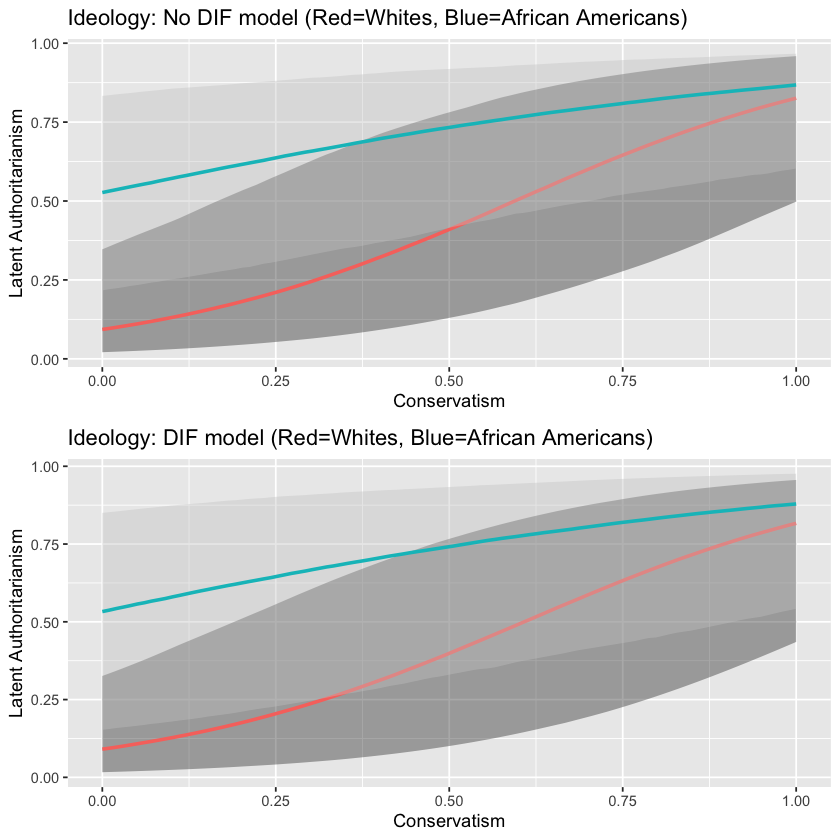

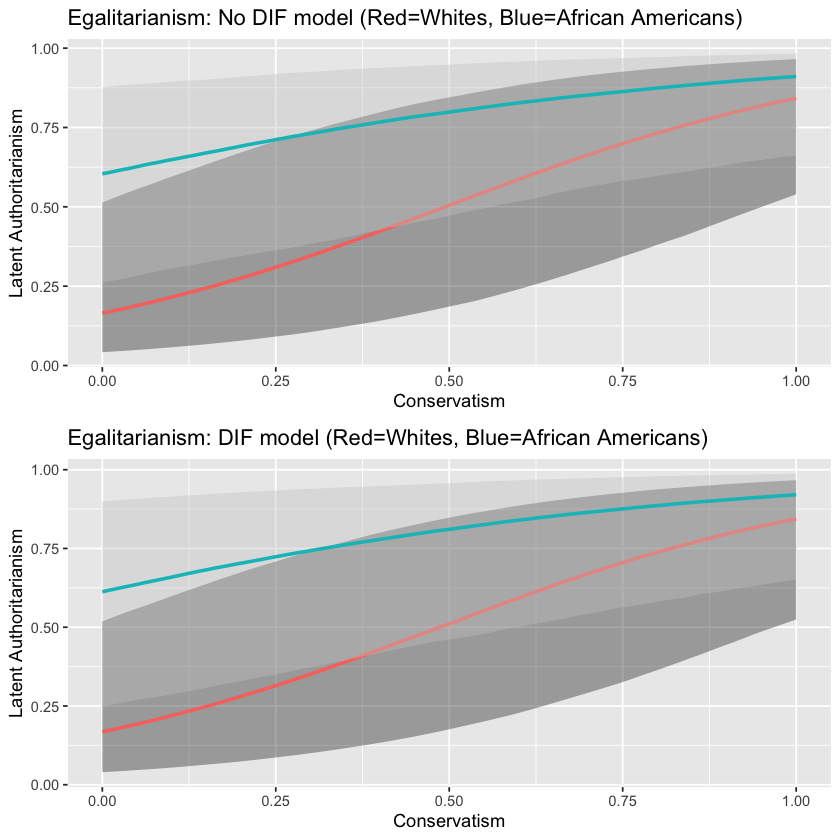

In [361]:
library(ggpubr)


p1=conditional_effects(m4, "ideology:race") 

plot1 = plot(p1, plot = FALSE)[[1]] + 
        theme(legend.position = "none") +
        labs(title = "Ideology: No DIF model (Red=Whites, Blue=African Americans)", x = "Conservatism", y="Latent Authoritarianism")+
        scale_fill_grey()


p1=conditional_effects(m5, "ideology:race") 

plot2 = plot(p1, plot = FALSE)[[1]] + 
        theme(legend.position = "none") +
        labs(title = "Ideology: DIF model (Red=Whites, Blue=African Americans)", x = "Conservatism", y="Latent Authoritarianism")+
        scale_fill_grey()


p1=conditional_effects(m6, "egalitarianism:race") 

plot3 = plot(p1, plot = FALSE)[[1]] + 
        theme(legend.position = "none") +
        labs(title = "Egalitarianism: No DIF model (Red=Whites, Blue=African Americans)", x = "Conservatism", y="Latent Authoritarianism")+
        scale_fill_grey()


p1=conditional_effects(m7, "egalitarianism:race") 

plot4 = plot(p1, plot = FALSE)[[1]] + 
        theme(legend.position = "none") +
        labs(title = "Egalitarianism: DIF model (Red=Whites, Blue=African Americans)", x = "Conservatism", y="Latent Authoritarianism")+
        scale_fill_grey()



ggarrange(plot1, plot2, nrow=2)
ggarrange(plot3, plot4, nrow=2)




The DIF-corrected model really doesn't substantively change things. The estimates change a bit, but it's quite small.

Here are the point estimates for ideology, the first estimate (m4) is the DIF model (see race|variable). The second is the DIF corrected model.

In [363]:
m4
m5


Warning message:
“There were 20 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”


 Family: bernoulli 
  Links: mu = logit 
Formula: value ~ 1 + race + ideology + ideology:race + (1 + race | variable) + (1 | id) 
   Data: stan_dat2 (Number of observations: 17396) 
Samples: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup samples = 4000

Group-Level Effects: 
~id (Number of levels: 4349) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     1.71      0.04     1.62     1.80 1.00     1497     2513

~variable (Number of levels: 4) 
                     Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
sd(Intercept)            1.59      0.72     0.70     3.55 1.00     1823
sd(race1)                0.60      0.42     0.19     1.70 1.00     1760
cor(Intercept,race1)    -0.63      0.38    -0.99     0.39 1.00     1982
                     Tail_ESS
sd(Intercept)            2407
sd(race1)                1743
cor(Intercept,race1)     2801

Population-Level Effects: 
               Estimate Est.Error l-95

Warning message:
“There were 5 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”


 Family: bernoulli 
  Links: mu = logit 
Formula: value ~ 1 + race + ideology + ideology:race + (1 | variable) + (1 | id) 
   Data: stan_dat2 (Number of observations: 17396) 
Samples: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup samples = 4000

Group-Level Effects: 
~id (Number of levels: 4349) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     1.71      0.04     1.62     1.79 1.01     1169     2422

~variable (Number of levels: 4) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     1.65      0.79     0.70     3.71 1.00     1861     2213

Population-Level Effects: 
               Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept         -2.33      0.80    -4.08    -0.73 1.00     1930     2047
race1              2.44      0.26     1.91     2.93 1.00     2328     2730
ideology           3.81      0.14     3.54     4.08 1.00     2488     3330
race1

Here is egalitarianism

In [364]:
m6
m7

Warning message:
“There were 22 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”


 Family: bernoulli 
  Links: mu = logit 
Formula: value ~ 1 + race + egalitarianism + egalitarianism:race + (1 + race | variable) + (1 | id) 
   Data: stan_dat2 (Number of observations: 17396) 
Samples: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup samples = 4000

Group-Level Effects: 
~id (Number of levels: 4349) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     1.77      0.05     1.68     1.86 1.00     1475     2546

~variable (Number of levels: 4) 
                     Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
sd(Intercept)            1.63      0.72     0.74     3.49 1.00     1836
sd(race1)                0.59      0.42     0.18     1.71 1.00     1666
cor(Intercept,race1)    -0.64      0.37    -0.99     0.37 1.00     1636
                     Tail_ESS
sd(Intercept)            2492
sd(race1)                2113
cor(Intercept,race1)     2265

Population-Level Effects: 
                     Estim

Warning message:
“There were 22 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”


 Family: bernoulli 
  Links: mu = logit 
Formula: value ~ 1 + race + egalitarianism + egalitarianism:race + (1 | variable) + (1 | id) 
   Data: stan_dat2 (Number of observations: 17396) 
Samples: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup samples = 4000

Group-Level Effects: 
~id (Number of levels: 4349) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     1.77      0.04     1.68     1.86 1.00     1412     2289

~variable (Number of levels: 4) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     1.65      0.75     0.72     3.60 1.00     1899     2130

Population-Level Effects: 
                     Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
Intercept               -1.60      0.78    -3.18     0.07 1.00     2328
race1                    2.07      0.19     1.69     2.43 1.00     2767
egalitarianism           3.28      0.14     3.02     3.56 1.00     3340
race1

## An alternative explanation

Here's where our understanding of authoritarianism (per what we discuss in the book) would come in. The differing effect for Whites and Blacks is not a measurement artifact, but rather, stems from how the construct should operate differently within these groups. 